In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def rgb2gray(rgb):
    if len(rgb.shape) == 3:
        r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
        return 0.2989 * r + 0.5870 * g + 0.1140 * b
    return rgb

img = io.imread("lena.jpg")
img = np.array(img)
img = rgb2gray(img)


laplace1 = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

laplace2 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

box = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9.0

fm = laplace1

In [5]:
def filter1(img, filt, off):
    h, w = img.shape
    N = filt.shape[0]
    out_h = ((h - N) // off) + 1
    out_w = ((w - N) // off) + 1
    out = np.zeros((out_h, out_w), dtype=np.int32)

    for i in range(out_h):
        for j in range(out_w):
            window = img[i*off:i*off+N, j*off:j*off+N]
            out[i, j] = np.sum(window * filt)

    # Clip auf 0–255 und zurück zu uint8
    return np.clip(out, 0, 255).astype(np.uint8)

In [6]:
def filter2(img, filt, off, edge):
    """
      'min' -> zero padding mit 0
      'max' -> padding mit 255
      'continue' -> edge padding
    """
    h, w = img.shape
    N = filt.shape[0]
    K = N // 2

    # Padding je nach edge-Modus
    if edge == 'min':
        padded = np.pad(img, ((K, K), (K, K)), mode='constant', constant_values=0)
    elif edge == 'max':
        padded = np.pad(img, ((K, K), (K, K)), mode='constant', constant_values=255)
    elif edge == 'continue':
        padded = np.pad(img, ((K, K), (K, K)), mode='edge')
    else:
        raise ValueError(f"Unbekannter edge-Modus '{edge}'")

    # Ausgabegröße (bei off=1 = gleiche Größe wie img)
    out_h = ((h + 2*K - N) // off) + 1
    out_w = ((w + 2*K - N) // off) + 1
    out = np.zeros((out_h, out_w), dtype=np.int32)

    for i in range(out_h):
        for j in range(out_w):
            window = padded[i*off:i*off+N, j*off:j*off+N]
            out[i, j] = np.sum(window * filt)

    return np.clip(out, 0, 255).astype(np.uint8)


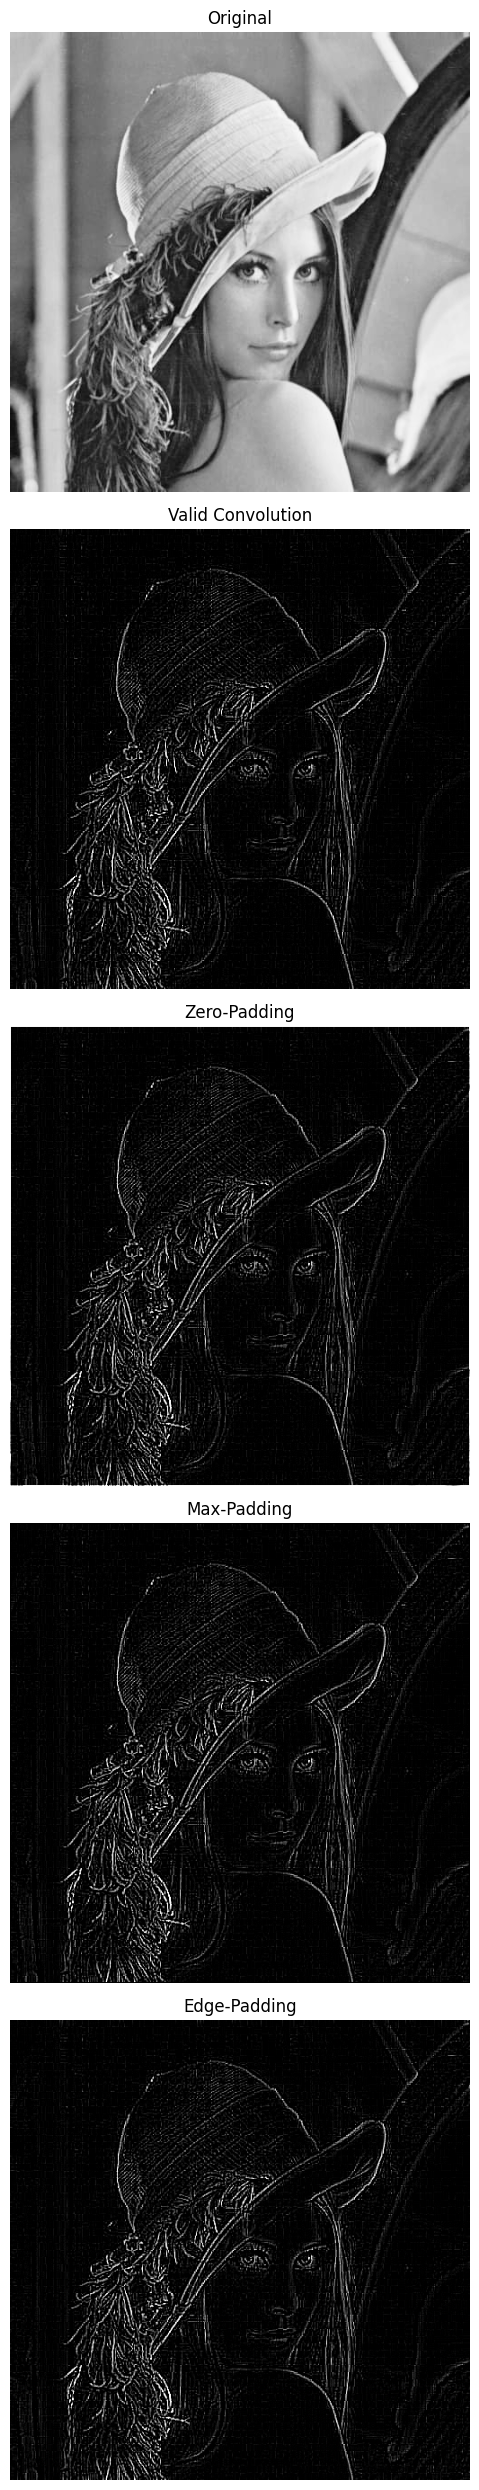

In [7]:
# no padding
out1 = filter1(img, fm, off=1)
# min
out2 = filter2(img, fm, off=1, edge='min')
# max
out3 = filter2(img, fm, off=1, edge='max')
# continue
out4 = filter2(img, fm, off=1, edge='continue')


fig, axes = plt.subplots(5, 1, figsize=(8, 25))

axes[0].imshow(img, cmap=cm.Greys_r)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(out1, cmap=cm.Greys_r)
axes[1].set_title('Valid Convolution')
axes[1].axis('off')

axes[2].imshow(out2, cmap=cm.Greys_r)
axes[2].set_title('Zero-Padding')
axes[2].axis('off')

axes[3].imshow(out3, cmap=cm.Greys_r)
axes[3].set_title('Max-Padding')
axes[3].axis('off')

axes[4].imshow(out4, cmap=cm.Greys_r)
axes[4].set_title('Edge-Padding')
axes[4].axis('off')

plt.tight_layout()
plt.show()